##building and saving model

In [1]:
 ##download dataset from gdrive 
 import shutil
 shutil.copy2('/content/drive/My Drive/Dataset/Dataset.zip','.')

'./Dataset.zip'

In [2]:
#extract the dataset
from zipfile import ZipFile
fname='Dataset.zip'
with ZipFile(fname,'r') as zip:
  zip.extractall()
  print('done')

done


In [8]:
import os

list = os.listdir('covid') # dir is your directory path
number_files = len(list)
print(number_files)

180


In [9]:
#make folder name dataset and cut the files into it for convinence
shutil.move('covid','dataset')
shutil.move('normal','dataset')

'dataset/normal'

In [11]:
#now separate train,test and validation data
#first change the name of covid to 0 and normal to 1 manually
import os
import random
os.chdir('dataset')
if os.path.isdir('train/0/') is False:
  os.mkdir('train')
  os.mkdir('valid')
  os.mkdir('test')

  for i in range(0,2):
    shutil.move(f'{i}','train')
    os.mkdir(f'valid/{i}')
    os.mkdir(f'test/{i}')
    #move directory to train and make drictorys in valid and test
    #now we have total 180 images so we take 25 for validation and 25 for test and rest of it for trainnig purpose

    test_samples=random.sample(os.listdir(f'train/{i}'),25)
    for j in test_samples:
      shutil.move(f'train/{i}/{j}',f'test/{i}')

    valid_samples=random.sample(os.listdir(f'train/{i}'),25)
    for j in valid_samples:
      shutil.move(f'train/{i}/{j}',f'valid/{i}') 
    


In [12]:
os.chdir('../')

In [13]:
list = os.listdir('dataset/test/0') # dir is your directory path
number_files = len(list)
print(number_files)

25


In [14]:
!ls

dataset  Dataset.zip  drive  sample_data


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [42]:
##now the dataset is completly ready for preprocessing
#now we have only 150 images so we use image datagenerator for making more images out of it
#here we use famous vgg16 filter
#logically we have to apply it only for train but we used same for test and validaton(genarally we only only take preproccessing to it)
train_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    width_shift_range=.05,
    height_shift_range=.05,
    zoom_range=.2,
    shear_range=.2,
    horizontal_flip=True,
                                       )

test_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    width_shift_range=.05,
    height_shift_range=.05,
    zoom_range=.2,
    shear_range=.2,
    horizontal_flip=True,
                                       )

valid_datagen=image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    width_shift_range=.05,
    height_shift_range=.05,
    zoom_range=.2,
    shear_range=.2,
    horizontal_flip=True,
                                       )

In [43]:
train_path='dataset/train'
valid_path='dataset/valid'
test_path='dataset/test'

In [63]:
train_gen=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    classes=['0','1']
)

test_gen=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    classes=['0','1']
)

valid_gen=valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224,224),
    batch_size=32,
    classes=['0','1']
)

Found 260 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [45]:
train_gen.class_indices

{'0': 0, '1': 1}

In [73]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))


model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(.5))

model.add(Dense(32,activation='relu'))
model.add(Dropout(.5))

# model.add(Dense(8,activation='relu'))
# model.add(Dropout(.5))

model.add(Dense(2,activation='softmax'))

In [74]:
from tensorflow.keras.optimizers import Adam
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [75]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 220, 220, 32)      9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_55 (Dropout)         (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 108, 108, 64)      18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 54, 54, 64)       

In [76]:
model.fit(x=train_gen,validation_data=valid_gen,steps_per_epoch=8,epochs=20,verbose=2)

Epoch 1/20
8/8 - 9s - loss: 16.7195 - accuracy: 0.4649 - val_loss: 0.6773 - val_accuracy: 0.5000
Epoch 2/20
8/8 - 8s - loss: 0.9470 - accuracy: 0.5000 - val_loss: 0.6909 - val_accuracy: 0.7200
Epoch 3/20
8/8 - 8s - loss: 0.6906 - accuracy: 0.5625 - val_loss: 0.6875 - val_accuracy: 0.6200
Epoch 4/20
8/8 - 8s - loss: 0.6872 - accuracy: 0.5877 - val_loss: 0.6787 - val_accuracy: 0.6200
Epoch 5/20
8/8 - 8s - loss: 0.6450 - accuracy: 0.6096 - val_loss: 0.6668 - val_accuracy: 0.8600
Epoch 6/20
8/8 - 8s - loss: 0.5760 - accuracy: 0.7061 - val_loss: 0.4148 - val_accuracy: 0.9400
Epoch 7/20
8/8 - 8s - loss: 0.4071 - accuracy: 0.8509 - val_loss: 0.2428 - val_accuracy: 0.9600
Epoch 8/20
8/8 - 9s - loss: 0.3274 - accuracy: 0.8684 - val_loss: 0.3230 - val_accuracy: 0.9800
Epoch 9/20
8/8 - 8s - loss: 0.3777 - accuracy: 0.8728 - val_loss: 0.4491 - val_accuracy: 0.9400
Epoch 10/20
8/8 - 8s - loss: 0.3288 - accuracy: 0.8640 - val_loss: 0.2159 - val_accuracy: 0.9800
Epoch 11/20
8/8 - 8s - loss: 0.3109 - 

In [77]:
predictions=model.predict(test_gen)

In [ ]:
##after shwong above outputs the model is not accurate at predictions
##so i tried another model

In [70]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes,rotation=0)

  if normalize:
    cm=cm.astype('float')/am.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,without normalization")
  
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [78]:
from sklearn.metrics import confusion_matrix
import itertools
cm=confusion_matrix(y_true=test_gen.classes,y_pred=np.argmax(predictions,axis=-1))

Confusion matrix,without normalization
[[10 15]
 [12 13]]


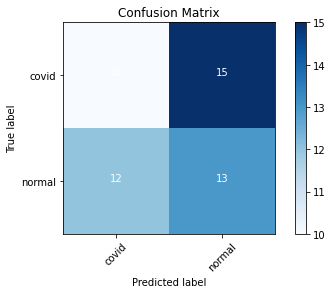

In [79]:
cm_plot_labels=['covid','normal']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')